In [1]:
import pandas as pd

In [2]:
#Loading the dataset
ds=pd.read_csv("C:\\Users\\alfar\\as.csv")

In [3]:
ds

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
ds.shape,ds.columns

((1000, 2), Index(['Review', 'Liked'], dtype='object'))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ds['Review'], ds['Liked'], test_size=0.2, random_state=42)

In [7]:
# Converting the text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # max_features 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
X_train_tfidf

<800x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7069 stored elements in Compressed Sparse Row format>

In [10]:
X_test_tfidf

<200x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1569 stored elements in Compressed Sparse Row format>

In [11]:
# Initializing the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [12]:
# Training the classifier on the training data
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [13]:
# Making the predictions on the test data
y_pred = svm_classifier.predict(X_test_tfidf)

In [14]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [15]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [16]:
# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        96
           1       0.88      0.72      0.79       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200



In [17]:
#for positive rating
from sklearn.metrics import precision_score, recall_score

# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Printing the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.88
Recall: 0.72


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[86 10]
 [29 75]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

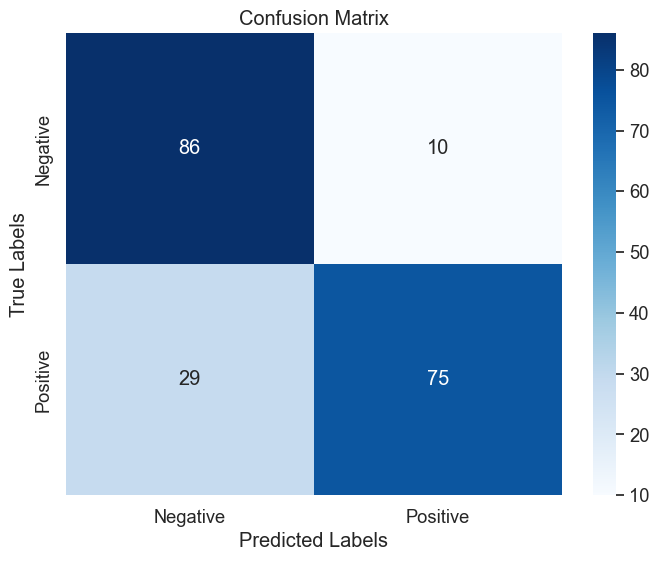

In [20]:
# Defining class labels
class_names = ['Negative', 'Positive']

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Adding labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Displaying the plot
plt.show()

In [21]:
from sklearn.manifold import TSNE

# Assuming you have already performed sentiment analysis and have TF-IDF vectors
# X_train_tfidf and X_test_tfidf from the previous example

# Combining the training and test sets for visualization
X_combined = np.vstack((X_train_tfidf.toarray(), X_test_tfidf.toarray()))
y_combined = np.hstack((y_train, y_test))

# Performing t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

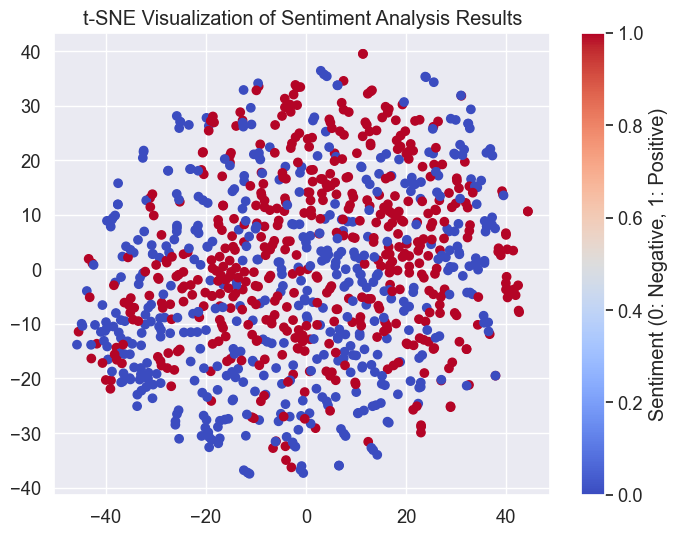

In [22]:
# Plotting the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_combined, cmap='coolwarm')
plt.colorbar(scatter, label='Sentiment (0: Negative, 1: Positive)')
plt.title('t-SNE Visualization of Sentiment Analysis Results')
plt.show()

In [23]:
# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy: 0.81
Precision: 0.88
Recall: 0.72
Confusion Matrix:
 [[86 10]
 [29 75]]
